In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from numpy.polynomial.polynomial import Polynomial
import warnings
warnings.filterwarnings('ignore')

In [2]:
GROUPS_NAMES = ["E", "N"]
BOOL_GROUPS_NAMES = [0,1]
METRICS=13
target_subjects = [1,19, 23,7, 24, 26, 10, 13, 16, 17, 20, 27]
selected_subjects = [1,19, 23,7, 24, 26, 10, 16, 17, 20]
#metrics_tw = np.empty((8*(len(target_subjects)-2), METRICS)) #remove 2 subjects with nan
#metrics_nh = np.empty((8*(len(target_subjects)-2), METRICS))
metrics_tw = np.empty((8*len(selected_subjects), METRICS)) #remove 2 subjects with nan
metrics_nh = np.empty((8*len(selected_subjects), METRICS))

In [3]:
def determine_expertise(score, bool =False):
    if (score < 4): 
        if bool:
            return BOOL_GROUPS_NAMES[0] #expert
        else: 
            return GROUPS_NAMES[0] #expert
    else : 
        if bool:
            return BOOL_GROUPS_NAMES[1]
        else:
            return GROUPS_NAMES[1] #non expert

def get_expertise(subject):
    subjects_info = np.load("subject_info_modified.npy")
    for row in subjects_info:
        if row[0] == subject:
            score = row[-1]
            return score

In [50]:
subject_number = 0
for subject in selected_subjects:
    data = np.load(f"Features/S_{subject}/ot_metrics.npy")

    metrics_tw[subject_number*8:(subject_number+1)*8, :] = data[:, :, 0]
    metrics_nh[subject_number*8:(subject_number+1)*8, :] = data[:, :, 1]

    subject_number = subject_number + 1

In [4]:
def expertise_array(selected_subjects):
    expertise = np.zeros(8*len(selected_subjects), dtype=int)
    for i in range (len(selected_subjects)):
        n = i*8
        m = (i+1)*8
        subject = selected_subjects[i]
        score = get_expertise(subject)
        level = determine_expertise(score, bool =True)
        expertise[n:m]=level
    return expertise #same dimension as metrics but with 0 when expert and 1 when novice

In [5]:
def cluster_data(data, number_of_cluster, target_subjects):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    kmeans = KMeans(n_clusters=number_of_cluster, random_state=0).fit(data_scaled)
    #print("Cluster Centers:", kmeans.cluster_centers_)
    #print("Labels:", kmeans.labels_)
    pca = PCA(n_components=4)

    reduced_data = pca.fit_transform(data_scaled)
    print(np.cumsum(pca.explained_variance_ratio_))

    markers = ['o', 'x']  # circles for 'e' (expert) and crosses for 'n' (non-expert)

    plt.figure(figsize=(10, 6))
    colors = ['green', 'blue']
    markers = ['o', 'x']  # circles for 'e' (expert) and crosses for 'n' (non-expert)

    expertise = expertise_array(target_subjects)
    
    for i in range(number_of_cluster):
            cluster_data = reduced_data[kmeans.labels_ == i]
            expertise_selected = expertise[kmeans.labels_ == i]
            
            for j, (data_point, exp) in enumerate(zip(cluster_data, expertise_selected)):
                marker = 'o' if exp == 0 else 'x'  # Circles for 'e' (expert), crosses for 'n' (non-expert)
                #label = 'Experts' if exp == 'e' else 'Novices'
                plt.scatter(data_point[0], data_point[1], color=colors[i], marker=marker, alpha=0.5, s=50, label=f'Cluster {i+1}' if j == 0 else None)
        
    centers = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200, color='black', label='Centers')
        
    plt.title('Cluster visualization with PCA-reduced data (2D)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()
    

In [6]:
def cluster_data(data, number_of_cluster, target_subjects):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    kmeans = KMeans(n_clusters=number_of_cluster, random_state=0).fit(data_scaled)
    
    pca = PCA(n_components=2)  # Utilisation de 2 composantes principales pour un plot en 2D
    reduced_data = pca.fit_transform(data_scaled)
    
    plt.figure(figsize=(10, 6))
    colors = ['green', 'blue']
    markers = ['o', 'x']  # Circles for 'e' (expert), crosses for 'n' (novice)
    
    expertise = expertise_array(target_subjects)  # Supposons que vous avez une fonction expertise_array qui retourne le niveau d'expertise
    
    for i in range(number_of_cluster):
        cluster_data = reduced_data[kmeans.labels_ == i]
        expertise_selected = expertise[kmeans.labels_ == i]
        
        for j, (data_point, exp) in enumerate(zip(cluster_data, expertise_selected)):
            marker = markers[0] if exp == 0 else markers[1]
            label = 'Experts' if exp == 0 else 'Novices'
            plt.scatter(data_point[0], data_point[1], color=colors[i], marker=marker, alpha=0.5, s=50, label=f'Cluster {i+1} - {label}' if j == 0 else None)
    
    centers = pca.transform(kmeans.cluster_centers_)
    for i, (center, color) in enumerate(zip(centers, colors)):
        plt.scatter(center[0], center[1], marker='X', s=200, color=color, label=f'Cluster {i+1} - Center')
    

    plt.title('Cluster visualization with PCA-reduced data (2D)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

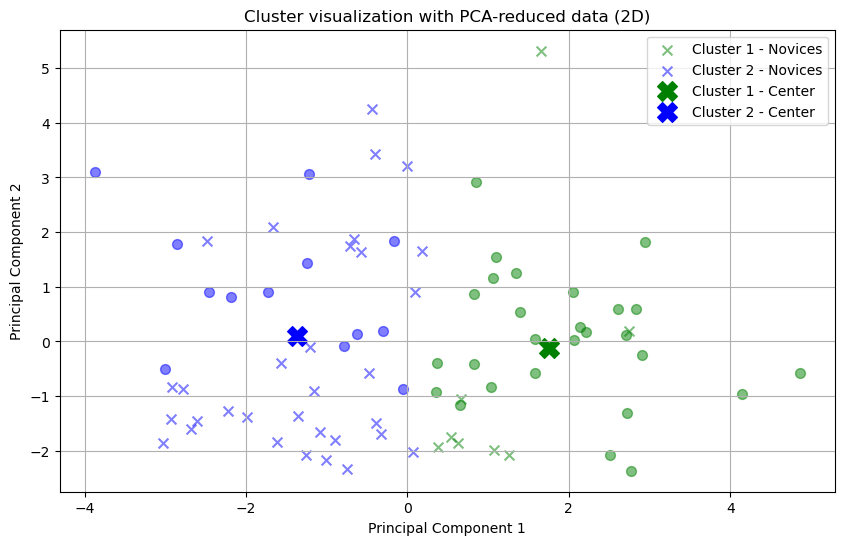

In [90]:
cluster_data(metrics_nh, 2, selected_subjects)

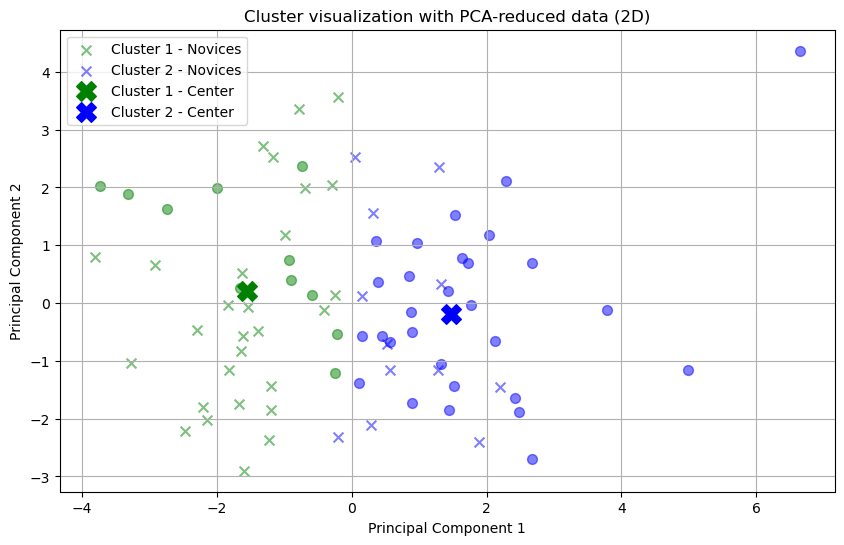

In [106]:
cluster_data(metrics_tw, 2, selected_subjects)

Only keeping significant metrics

In [7]:
METRICS_NH=7
METRICS_TW= 5
target_subjects = [1,19, 23,7, 24, 26, 10, 13, 16, 17, 20, 27]
#metrics_tw = np.empty((8*(len(target_subjects)-2), METRICS)) #remove 2 subjects with nan
#metrics_nh = np.empty((8*(len(target_subjects)-2), METRICS))
metrics_nh_selected_ = np.empty((8*len(target_subjects), METRICS_NH)) #remove 2 subjects with nan
metrics_tw_selected_ = np.empty((8*len(target_subjects), METRICS_TW))

In [8]:
def select_significant_metrics(pos_to_del, array):
    data_selected = array.copy()
    for idx in sorted(pos_to_del, reverse=True):  # Parcourir les indices en ordre décroissant
        data_selected = np.delete(data_selected, idx, axis=1)
    return data_selected

In [13]:
subject_number = 0
for subject in selected_subjects:
    data = np.load(f"Features/S_{subject}/ot_metrics.npy")
    print(data.shape)
    data_nh = data[:, :, 1]
    data_tw = data[:, :, 0]
    col_to_del_nh = [7,8,9,10,11,12]
    col_to_del_tw = [4,5,7,8,9,10,11,12]

    data_selected_nh = select_significant_metrics(col_to_del_nh, data_nh)
    data_selected_tw = select_significant_metrics(col_to_del_tw, data_tw)

    metrics_tw_selected_[subject_number*8:(subject_number+1)*8, :] = data_selected_tw
    metrics_nh_selected_[subject_number*8:(subject_number+1)*8, :] = data_selected_nh

    subject_number = subject_number + 1

(8, 13, 2)
(8, 13, 2)
(8, 13, 2)
(8, 13, 2)
(8, 13, 2)
(8, 13, 2)
(8, 13, 2)
(8, 13, 2)
(8, 13, 2)
(8, 13, 2)


In [14]:
metrics_tw_selected_.shape, np.empty((8*len(target_subjects), 13)).shape

((96, 5), (96, 13))

In [10]:
cluster_data(metrics_tw_selected_, 2, target_subjects)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [101]:
data = np.load(f"Features/S_{1}/ot_metrics.npy")
col_to_del_nh = [7,8,9,10,11,12]
col_to_del_tw = [4,5,7,8,9,10,11,12]
data_nh = data[:, :, 1]
data_tw = data[:, :, 0]

data_nh_selected = data_nh.copy()  # Copie de data_nh pour ne pas modifier l'original
data_tw_selected = data_tw.copy()

for idx in sorted(col_to_del_nh, reverse=True):  # Parcourir les indices en ordre décroissant
    data_nh_selected = np.delete(data_nh_selected, idx, axis=1)

for idx in sorted(col_to_del_tw, reverse=True):  # Parcourir les indices en ordre décroissant
    data_tw_selected = np.delete(data_tw_selected, idx, axis=1)

data_nh.shape, data_nh_selected.shape, data_tw.shape, data_tw_selected.shape

((8, 13), (8, 7), (8, 13), (8, 5))